<a href="https://colab.research.google.com/github/algo74/MLCourse/blob/master/HW1/hw1_problem4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW1. Problem 4. 


* Load the training and test data using Keras, no validation set needed.
* Create network with an input layer consisting of 28 x 28 input neurons and an output layer consisting of 10 output neurons.
* Use softmax and categorical cross entropy loss.
* Implement mini-batch stochastic gradient descent using Keras.




##Comments
* Code for loading and preparing of the data and some other code is reused from `mnist_digits_classification_dense_layers.ipynb`

## Loading the image data

In [1]:
from keras.datasets import mnist

(train_images_original, train_labels_original), (test_images_original, test_labels_original) = mnist.load_data()

Using TensorFlow backend.


## Preparing the image data

In [0]:
train_images = train_images_original.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images_original.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

## Preparing the labels

We need to categorically encode the labels.

In [0]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels_original)
test_labels = to_categorical(test_labels_original)

## The network architecture

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


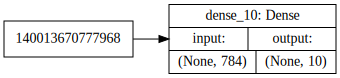

In [24]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(10, activation='softmax', input_shape=(28 * 28,)))
network.summary()

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(network, show_shapes=True, rankdir='LR').create(prog='dot', format='svg'))


## The compilation step

In [0]:
network.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])



## The training step

In [6]:
epochs = 50
history = network.fit(train_images, 
                      train_labels, 
                      epochs=epochs, 
                      batch_size=128, 
                      validation_data=(test_images, test_labels))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 40us/step - loss: 1.2744 - acc: 0.7031 - val_loss: 0.8053 - val_acc: 0.8328
Epoch 2/50
60000/60000 [==============================] - 2s 27us/step - loss: 0.7112 - acc: 0.8422 - val_loss: 0.6046 - val_acc: 0.8613
Epoch 3/50
60000/60000 [==============================] - 2s 27us/step - loss: 0.5840 - acc: 0.8605 - val_loss: 0.5242 - val_acc: 0.8730
Epoch 4/50
60000/60000 [==============================] - 2s 27us/step - loss: 0.5230 - acc: 0.8692 - val_loss: 0.4790 - val_acc: 0.8804
Epoch 5/50
60000/60000 [==============================] - 2s 27us/step - loss: 0.4858 - acc: 0.8763 - val_loss: 0.4494 - val_acc: 0.8847
Epoch 6/50
60000/60000 [==============================] - 2s 27us/step - loss: 0.4602 - acc: 0.8801 - val_loss: 0.4282 - val_acc: 0.8891
Epoch 7/50
60000/60000 [==============================] - 2s 27us/step - loss: 0

## Display the training/test loss/accuracy

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)

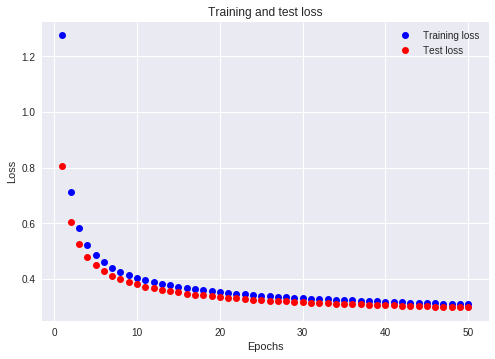

In [10]:
import matplotlib.pyplot as plt

plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

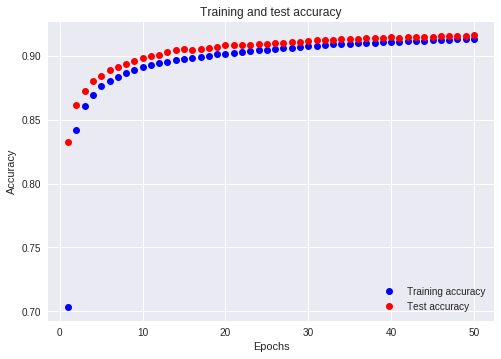

In [13]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()